In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline

import sys
sys.path.append('../../')
import logomaker

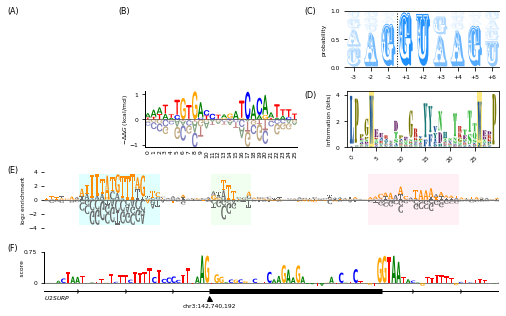

In [2]:
# set default styling 
fontsize=6
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

# create figure and gridspec
fig = plt.figure(figsize=(7, 4.5))
gs = gridspec.GridSpec(nrows=4, ncols=5)

###############################################
### CRP logo
ax = fig.add_subplot(gs[1, 1:3])

# load crp energy matrix
crp_df = -logomaker.get_example_matrix('crp_energy_matrix',
                                        print_description=False)

# create Logo object
crp_logo = logomaker.Logo(crp_df,
                          ax=ax,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)

###############################################
### 5'ss logo
ax = fig.add_subplot(gs[0, 3:5])

# load ss probability matrix
ss_df = logomaker.get_example_matrix('ss_probability_matrix',
                                     print_description=False)

# create Logo object
ss_logo = logomaker.Logo(ss_df,
                         ax=ax,
                         width=.8,
                         vpad=.05,
                         fade_probabilities=True,
                         stack_order='small_on_top',
                         color_scheme='dodgerblue',
                         font_name='Rosewood Std')

# style using Logo methods
ss_logo.style_spines(spines=['left', 'right'], visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(ss_df)))
ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_yticks([0, .5, 1])
ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
ss_logo.ax.set_ylabel('probability')

###############################################
### WW logo
ax = fig.add_subplot(gs[1, 3:5])

# load ww information matrix
ww_df = logomaker.get_example_matrix('ww_information_matrix',
                                     print_description=False)

# create logo object
ww_logo = logomaker.Logo(ww_df,
                         ax=ax,
                         font_name='Stencil Std',
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8)

# style using Logo methods
ww_logo.style_xticks(anchor=0, spacing=5, rotation=45)
ww_logo.highlight_position(p=4, color='gold', alpha=.5)
ww_logo.highlight_position(p=26, color='gold', alpha=.5)

# style using Axes methods
ww_logo.ax.set_ylabel('information (bits)')
ww_logo.ax.set_xlim([-1, len(ww_df)])

###############################################
### ARS logo
ax = fig.add_subplot(gs[2, :])

# load ARS enrichment matrix
ars_df = logomaker.get_example_matrix('ars_enrichment_matrix',
                                      print_description=False)

# load wild-type ARS1 sequence
with logomaker.open_example_datafile('ars_wt_sequence.txt',
                                     print_description=False) as f:
    lines = f.readlines()
    lines = [l.strip() for l in lines if '#' not in l]
    ars_seq = ''.join(lines)

# trim matrix and sequence
start = 10
stop = 100
ars_df = ars_df.iloc[start:stop, :]
ars_df.reset_index(inplace=True, drop=True)
ars_seq = ars_seq[start:stop]

# create Logo object
ars_logo = logomaker.Logo(ars_df,
                          ax=ax,
                          color_scheme='dimgray',
                          font_name='Luxi Mono')

# color wild-type ARS1 sequence within logo
ars_logo.style_glyphs_in_sequence(sequence=ars_seq, color='darkorange')

# highlight functional regions of ARS1
ars_logo.highlight_position_range(pmin=7, pmax=22, color='lightcyan')
ars_logo.highlight_position_range(pmin=33, pmax=40, color='honeydew')
ars_logo.highlight_position_range(pmin=64, pmax=81, color='lavenderblush')

# additional styling using Logo methods
ars_logo.style_spines(visible=False)

# style using Axes methods
ars_logo.ax.set_ylim([-4, 4])
ars_logo.ax.set_ylabel('$\log_2$ enrichment', labelpad=0)
ars_logo.ax.set_yticks([-4, -2, 0, 2, 4])
ars_logo.ax.set_xticks([])

###############################################
### saliency logo
ax = fig.add_subplot(gs[3, :])

# load saliency matrix
nn_df = logomaker.get_example_matrix('nn_saliency_matrix',
                                     print_description=False)

# create Logo object
nn_logo = logomaker.Logo(nn_df, ax=ax)

# style using Logo methods
nn_logo.style_spines(visible=False)
nn_logo.style_spines(spines=['left'], visible=True, bounds=[0, .75])

# style using Axes methods
nn_logo.ax.set_xlim([20, 115])
nn_logo.ax.set_xticks([])
nn_logo.ax.set_ylim([-.6, .75])
nn_logo.ax.set_yticks([0, .75])
nn_logo.ax.set_yticklabels(['0', '0.75'])
nn_logo.ax.set_ylabel('             score', labelpad=-1)

# set parameters for drawing gene
exon_start = 55-.5
exon_stop = 90+.5
y = -.2
xs = np.arange(-3, len(nn_df),10)
ys = y*np.ones(len(xs))

# draw gene
nn_logo.ax.axhline(y, color='k', linewidth=1)
nn_logo.ax.plot(xs, ys, marker='4', linewidth=0, markersize=5, color='k')
nn_logo.ax.plot([exon_start, exon_stop],
                [y, y], color='k', linewidth=5, solid_capstyle='butt')

# annotate gene
nn_logo.ax.plot(exon_start, 1.8*y, '^k', markersize=5)
nn_logo.ax.text(20,2*y,'$U2SURP$')
nn_logo.ax.text(exon_start, 2.5*y,'chr3:142,740,192', verticalalignment='top', horizontalalignment='center')

###############################################
### annotate and adjust figure

# tighten layout
plt.tight_layout(h_pad=1, w_pad=4, pad=2)

# Add panel labels
x1=.00
x2=.22
x3=.59

y1=.97
y2=.71
y3=.48
y4=.24

kwargs = {'fontsize':8, 'horizontalalignment':'left', 'verticalalignment':'top'}

plt.figtext(x1, y1,'(A)', **kwargs)
plt.figtext(x2, y1,'(B)', **kwargs)
plt.figtext(x3, y1,'(C)', **kwargs)
plt.figtext(x3, y2,'(D)', **kwargs)
plt.figtext(x1, y3,'(E)', **kwargs)
plt.figtext(x1, y4,'(F)', **kwargs)

# save a pdf
fig.savefig('logos/figure1_logos.pdf', transparent=True)

In [3]:
### Print out CRP emat for Fig 1A
print('       A      C      G      T')
for i, row in crp_df.iterrows():
    if i <= 9 or i==25:
        line = '%2d'%i + ''.join(['  %+1.2f'%x for x in row])
        print(line)
    if i == 10:
        print('')

       A      C      G      T
 0  +0.18  -0.16  -0.09  +0.07
 1  +0.29  -0.28  -0.11  +0.10
 2  +0.28  -0.32  -0.17  +0.21
 3  +0.23  -0.29  -0.30  +0.36
 4  +0.06  -0.14  -0.06  +0.14
 5  -0.29  +0.17  -0.49  +0.61
 6  -0.18  -0.62  +0.85  -0.06
 7  -0.03  -0.21  -0.32  +0.57
 8  -0.44  -0.59  +1.12  -0.08
 9  +0.63  +0.06  -0.29  -0.40

25  -0.12  -0.02  -0.09  +0.23
